In [12]:
#Importing Libraries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.metrics import categorical_crossentropy
import numpy as np
import itertools
import matplotlib.image as img
import pathlib 

In [13]:
#Loading dataset

path = pathlib.Path("C:/Users/adrya/Downloads/archive (1)/flower_images")


lilly = list(path.glob('Lilly/*'))[:1000]
lotus = list(path.glob('Lotus/*'))[:1000]
orchid = list(path.glob('Orchid/*'))[:1000]
sunflower = list(path.glob('Sunflower/*'))[:1000]
tulip = list(path.glob('Tulip/*'))[:1000]
data = {
    'lilly' : lilly,
    'lotus' : lotus,
    'orchid' : orchid,
    'sunflower' : sunflower,
    'tulip': tulip
}
flower_labels= {k:v for k,v in enumerate(data.keys())}


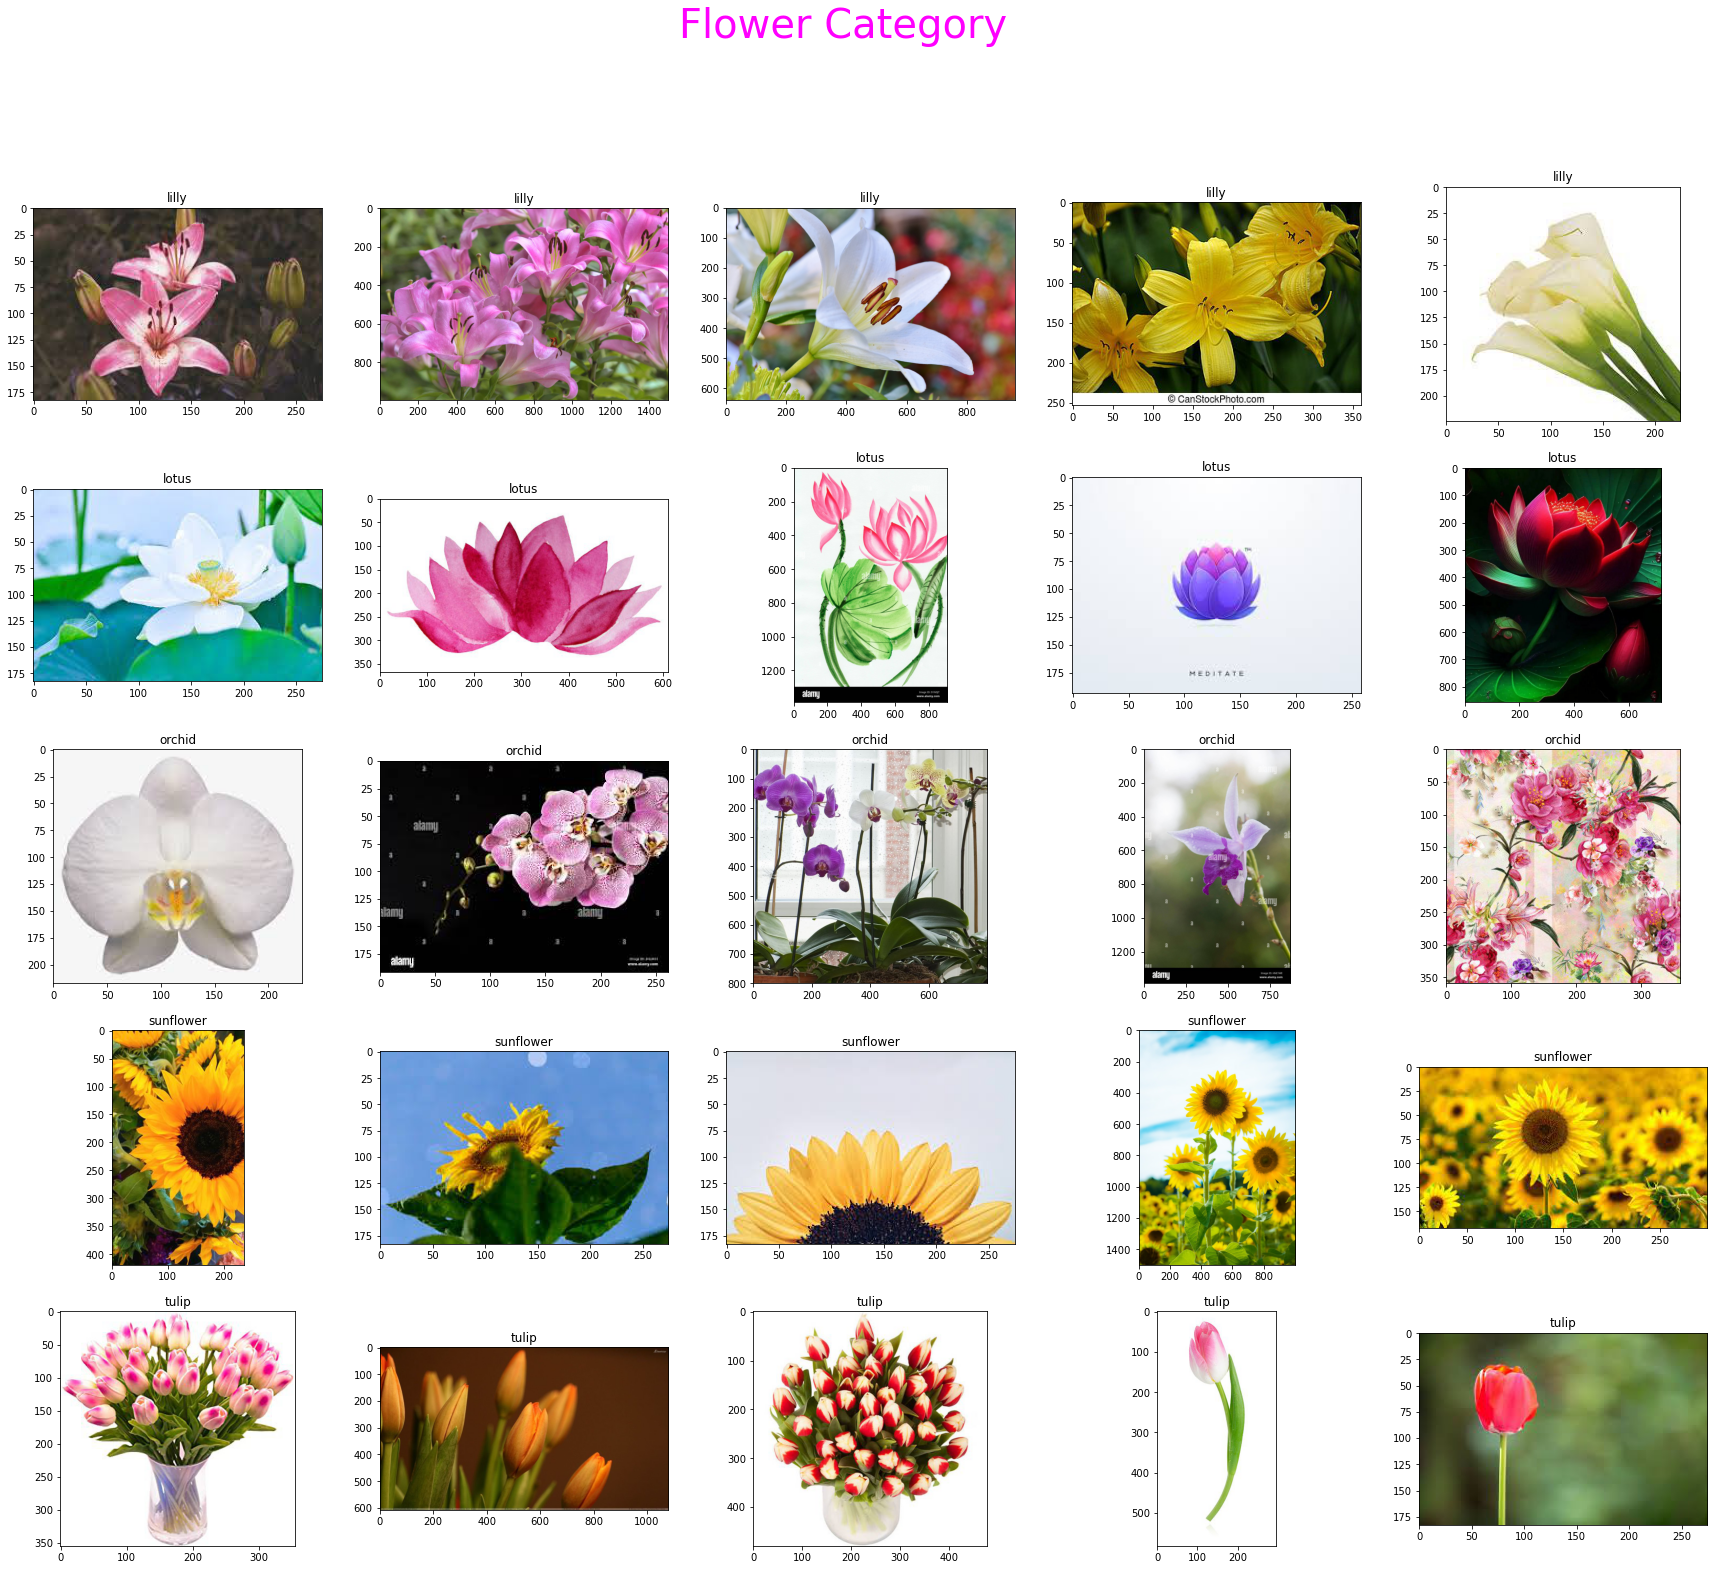

In [14]:
#Visualization

fig, ax = plt.subplots(5,5, figsize=(30,25))
fig.suptitle('Flower Category',color='magenta',fontsize=40)
for i in range(5):
    for j in range(5):
        image = img.imread(data.get(flower_labels.get(i))[j])
        ax[i, j].imshow(image)
        ax[i, j].set_title(flower_labels.get(i))

In [15]:
#Train and test split

train_gen=ImageDataGenerator(
                                rescale = 1./255,
                                
                                validation_split=0.2  # set validation split to 20% 
                                )
train_data=train_gen.flow_from_directory("C:/Users/adrya/Downloads/archive (1)/flower_images",target_size=(224,224),batch_size=32,
                                         class_mode='categorical',
                                         shuffle=True,
                                         subset='training')
test_data=train_gen.flow_from_directory("C:/Users/adrya/Downloads/archive (1)/flower_images",target_size=(224,224),batch_size=1,
                                        shuffle=False,subset='validation')

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [16]:
#Creating CNN model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [17]:
#Compilation and train of the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



model.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
125/125 [==============================] - 171s 1s/step - loss: 1.3160 - accuracy: 0.4595 - val_loss: 1.0502 - val_accuracy: 0.5690
Epoch 2/5
125/125 [==============================] - 169s 1s/step - loss: 0.8942 - accuracy: 0.6575 - val_loss: 0.8210 - val_accuracy: 0.6770
Epoch 3/5
125/125 [==============================] - 164s 1s/step - loss: 0.5522 - accuracy: 0.8062 - val_loss: 0.7353 - val_accuracy: 0.7690
Epoch 4/5
125/125 [==============================] - 165s 1s/step - loss: 0.3195 - accuracy: 0.8947 - val_loss: 0.7683 - val_accuracy: 0.7750
Epoch 5/5
125/125 [==============================] - 164s 1s/step - loss: 0.1619 - accuracy: 0.9513 - val_loss: 0.8069 - val_accuracy: 0.8200


In [18]:
#labels and predictions

predictions = model.predict(test_data)
true_labels = test_data.classes
predicted_labels = np.argmax(predictions, axis=1)

1000/1000 [==============================] - 27s 20ms/step


In [19]:
#Classification Report

class_names = list(test_data.class_indices.keys())
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       Lilly       0.80      0.73      0.77       200
       Lotus       0.82      0.86      0.84       200
      Orchid       0.78      0.69      0.73       200
   Sunflower       0.95      0.95      0.95       200
       Tulip       0.76      0.86      0.81       200

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



array([[147,  15,  20,   2,  16],
       [  8, 172,   9,   2,   9],
       [ 18,  17, 137,   2,  26],
       [  5,   0,   0, 191,   4],
       [  6,   7,   9,   5, 173]], dtype=int64)

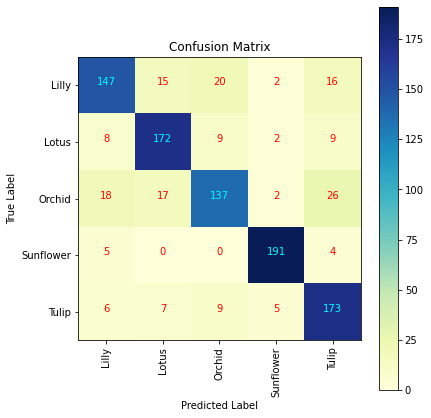

In [23]:
#Confusion Matrix

cm = confusion_matrix(test_data.classes, predicted_labels)
d1=test_data.class_indices
classes = list(d1.keys())
cmap= plt.cm.YlGnBu
plt.figure(figsize= (6, 6))
plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
plt.title('Confusion Matrix')
plt.colorbar(shrink=True)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 90)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'aqua' if cm[i, j] > thresh else 'red')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
cm

In [25]:
#Save the model

import joblib

model_filename = 'trained_model_flower_images.joblib'
joblib.dump(model, model_filename)
print(f'Model saved as {model_filename}')

Model saved as trained_model_flower_images.joblib
